In [1]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Import Data

X, y = load_digits(return_X_y=True, as_frame=True)
# X.drop(['s6', 'age', 's3'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=97)
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


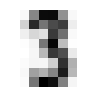

In [3]:
# Feature Evaluation (average pixel density)

i = 3
data = X_train[y_train == i].mean().to_numpy().reshape(8, 8)
plt.figure(figsize=(1, 1))
plt.imshow(data, cmap='Grays')
plt.axis('off')
plt.show()

y=0
[ 0.  0.  4. 11. 15.  8.  0.  0.  0.  0. 13. 16. 11. 13.  7.  0.  0.  3.
 16. 12.  0.  4.  8.  0.  0.  6. 16.  5.  0.  4.  8.  0.  0.  7.  9.  0.
  0.  9.  7.  0.  0.  4. 10.  0.  2. 15.  2.  0.  0.  1. 16. 12. 14. 10.
  0.  0.  0.  0.  4. 14. 14.  1.  0.  0.]


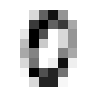

In [4]:
# Feature Evaluation (random single example)

i = np.random.randint(0, len(y))
example = X.iloc[i].to_numpy()
plt.figure(figsize=(1, 1))
plt.imshow(example.reshape(8, 8), cmap='Grays')
plt.axis('off')
print(f'y={y[i]}')
print(example)

In [5]:
# Model training / evaluation

clf = RandomForestClassifier()
# clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9703703703703703

pred=3 actual=9


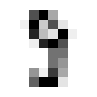

In [6]:
# Ispect errors
y_pred = pd.Series(clf.predict(X_test), index=y_test.index)
errors = y_test[y_pred != y_test].index
i = np.random.choice(errors)

plt.figure(figsize=(1, 1))
plt.imshow(X_test.loc[i].to_numpy().reshape(8, 8), cmap='Grays')
plt.axis('off')
print(f'pred={y_pred.loc[i]} actual={y_test.loc[i]}')